# Udacity: Intro to Data Analysis Project

#### Purpose

The purpose of this notebook is to explore a sample of data of the survivors of the Titanic. And, to gleam any factors that may have contributed to a survivor survival. In this analysis, we are going to look at the data quality then look at the relationship between sex and age in survival, the relationship between fare and survival, the relationship between passenger class and survival. Then, conclude with further research topics. 

The raw data set can be found [here](https://d17h27t6h515a5.cloudfront.net/topher/2016/September/57e9a84c_titanic-data/titanic-data.csv).

The description of the data set can be found [here](https://www.kaggle.com/c/titanic/data).

### Imports

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

### Processing the Data

In [4]:
data_file = 'titanic-data.csv'

titanic_raw_df = pd.read_csv(data_file, header=0)

In [5]:
titanic_raw_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic_raw_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### Analysis of the Data

#### Assessing the Data

After loading the csv into python and small visual check of the data. I want to examine the data types of the columns and the number of values for each row.

In [7]:
row, col = titanic_raw_df.shape
print("The shape of the overall dataframe is {0} by {1}".format(row, col))
print()
print(titanic_raw_df.info())

The shape of the overall dataframe is 891 by 12

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


There are a total of __891__ rows; however, __age, cabin, and embarked __ seem to have values missing. Embarked is missing 2, age is missing 177 entries, and cabin is missing 687. Cabin is quite interesting because one might think they would have the complete records of cabin assignments. But, that might not be the case.

Regarding the data types of each column. No column seems unusual, no mixed data types. Values that are considered 'numerical' like age and fare are ints and floats respectively. And, string type values are objects. So, I will proceed and look at the numerical columns' summary statistics i.e. mean, medium, etc.


#### Handling of missing values

For my analysis, the missing data for cabin and embarked don't matter. However, I do want want to analysis that is depended on __age__. Trying to fill in the missing age data is a little out of scope of this exploratory analysis. But, it could possible to 'guess' a persona's age based on other data points. For example, name. 

Let's take a look at the different kinds of titles. In this dataset, the typical format for a name is Last_Name, Tile. First_Name Middle_Name. It can be easily parsed to get the counts.

In [103]:
title_df = pd.Series([name.split(",")[1].split(".")[0] for name in titanic_raw_df['Name']])
print("Counts of Titanic passenger counts")
title_df.value_counts()

Counts of Titanic passenger counts


 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Major             2
 Col               2
 Mlle              2
 Jonkheer          1
 Capt              1
 Don               1
 Ms                1
 Mme               1
 Lady              1
 Sir               1
 the Countess      1
dtype: int64

For name, titles like miss and master had a special meaning. Typically, they are ways to refer to younger people. Miss being a way to address unmarried [women](https://en.wikipedia.org/wiki/Miss) though older unmarried women would be also be called miss. And, master is usually a way to refer to young [men](https://en.wikipedia.org/wiki/Master_(form_of_address)). Then there are other titles like Dr. that most likely refer to older men. In fact, someone has done this sort of [analysis](https://www.kaggle.com/waypointgroup/fill-in-missing-age-data-in-titanic-data-set).

But, for regarding this analysis, the descriptive statistics for __age__ will not use any missing values. And, in the section __'Where women and child more likely to survive?'__ will __not__ use any data points who sex is male and is missing an age value. As a result, about 124 data points will not be included in this analysis.

In [8]:
missing_male_age = (titanic_raw_df['Age']  != titanic_raw_df['Age']) & \
                    (titanic_raw_df['Sex'] == 'male')
    
row_count = titanic_raw_df[missing_male_age].shape[0]

print("The number of missing male ages is {0}".format(row_count))

titanic_raw_df[missing_male_age].head()

The number of missing male ages is 124


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C


#### Descriptive Statistics

Pair plot of the Titanic data


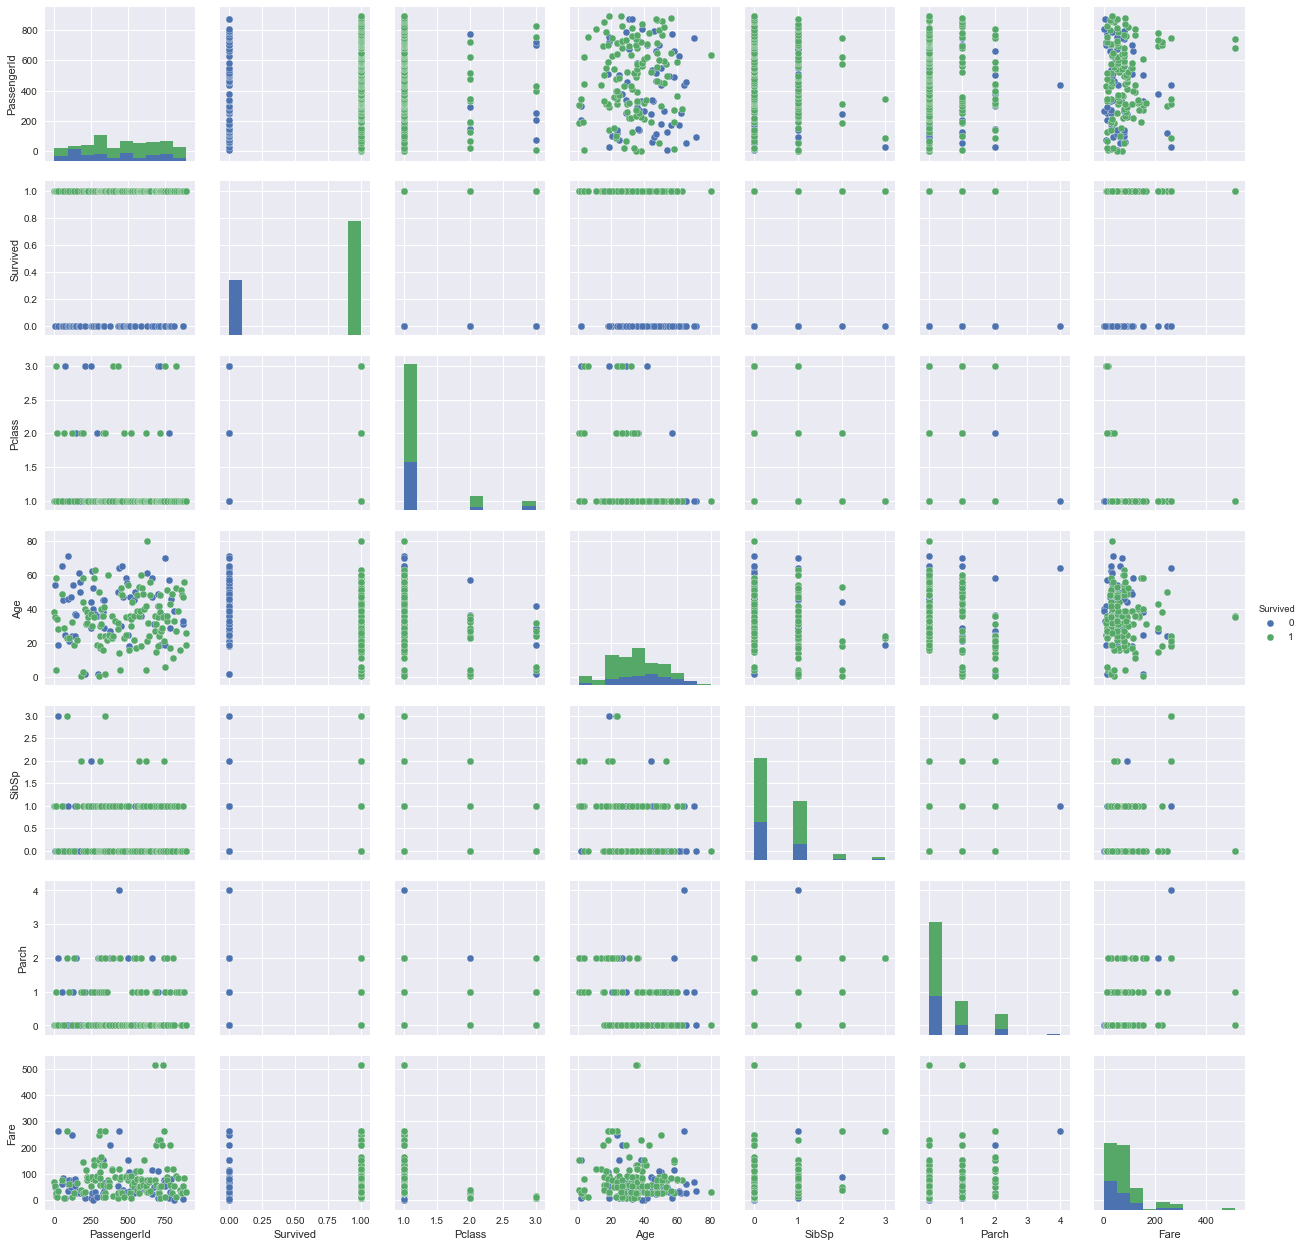

In [9]:
print("Pair plot of the Titanic data")
g = seaborn.pairplot(titanic_raw_df.dropna(), hue='Survived')

In [13]:
print("Descriptive statistics of continuous data")

Descriptive statistics of continuous data


In [17]:

titanic_raw_df[['Age', 'SibSp','Parch', 'Fare']].describe()

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


Age seems fairly responsible. The IQR is from 20 to 38, so about 50% were adults.

The sibling and parent-child data seems a little surprising. I had expected more people to travel with family. Since the number of relationships can be grouped by whole numbers, I will look at the counts for a more granular analysis. 

The fare's mean is about £32, or £3400 today (\$4452). The fare's max seems a little strange. The max value is £512 pounds, the value seems a little high. If you adjust for inflation that would be about £55k or \$72k. However, given the Titanic was a luxury ship, it doesn't seem to outlandish. In fact, according to a Wikipedia article, a passenger spent up to £870 for first class tickets. The article can be found [here](https://en.wikipedia.org/wiki/RMS_Titanic).


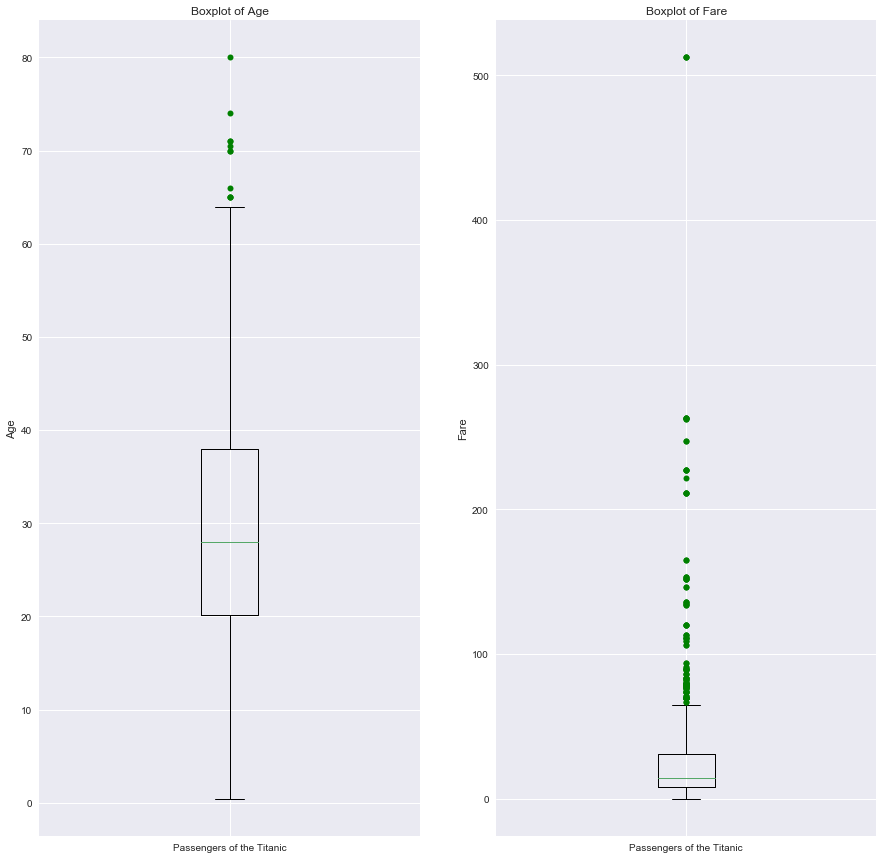

In [19]:
fig, ax = plt.subplots(1, 2)
fig.set_figheight(15)
fig.set_figwidth(15)

ax[0].boxplot(titanic_raw_df['Age'].dropna().values, sym='g')
ax[0].set_title("Boxplot of Age")
ax[0].set_ylabel("Age")
ax[0].set_xticklabels(["Passengers of the Titanic"])

ax[1].boxplot(titanic_raw_df['Fare'].dropna().values, sym='g')
ax[1].set_title("Boxplot of Fare")
ax[1].set_ylabel("Fare")
ax[1].set_xticklabels(["Passengers of the Titanic"])

plt.show()

I see a fair number of outliers, which is to be expected for a luxury cruise ship, but nothing else too usual from the boxplot.

In [20]:
for col in ['Survived', 'Pclass', 'Sex', 'Embarked', 'SibSp','Parch']:
    print("----- Counts of {0} -----".format(col))
    print(titanic_raw_df[col].value_counts(dropna=False))
    print()

----- Counts of Survived -----
0    549
1    342
Name: Survived, dtype: int64

----- Counts of Pclass -----
3    491
1    216
2    184
Name: Pclass, dtype: int64

----- Counts of Sex -----
male      577
female    314
Name: Sex, dtype: int64

----- Counts of Embarked -----
S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

----- Counts of SibSp -----
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

----- Counts of Parch -----
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64



I take counts of the different possible values for each column, and all values seems reasonable. Only the 'embarked' column has unusual values, 'Nan'.

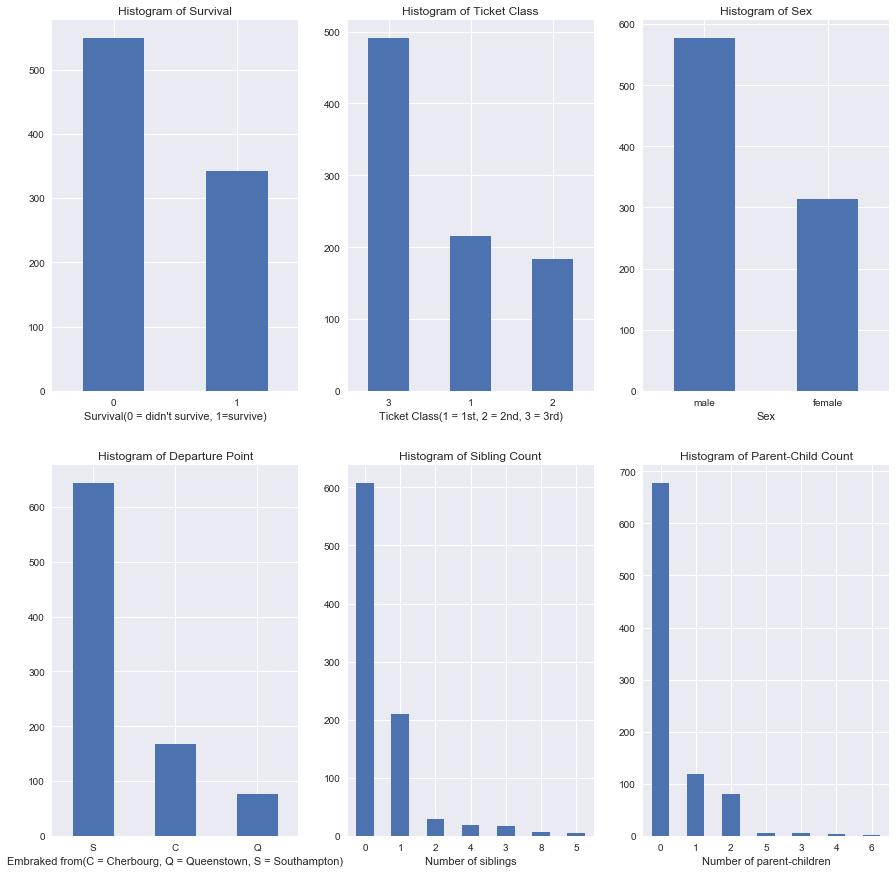

In [21]:
fig, ax = plt.subplots(2, 3)
fig.set_figheight(15)
fig.set_figwidth(15)


labels = ["Survival(0 = didn't survive, 1=survive)",
       "Ticket Class(1 = 1st, 2 = 2nd, 3 = 3rd)",
       "Sex",
       "Embraked from(C = Cherbourg, Q = Queenstown, S = Southampton)",
       "Number of siblings",
       "Number of parent-children"]

titles = ['Survival', 'Ticket Class', 'Sex',
        'Departure Point', 'Sibling Count', 'Parent-Child Count']
cols = ['Survived', 'Pclass', 'Sex', 'Embarked', 
                           'SibSp','Parch']

for idx, label, title, col in zip(range(len(labels)), labels, titles, cols):
    row, cols = (idx // 3), (idx % 3)
    ax_ = titanic_raw_df[col].value_counts().plot(kind='bar', ax=ax[row, cols],
                                         rot=0,
                                        title='Histogram of {0}'.format(title))
    ax_.set_xlabel(label)
plt.show()

The above is a visual represntation of the preiovusly mentioned counts data. 

## Who was more likely to survive?

I have several possible factors in mind that might have given some people an edge in surviving the titanic.

First: There's an old code of conduct of ['women and children first'](https://en.wikipedia.org/wiki/Women_and_children_first). I want to see if we had data to support this claim.

Second: People who paid more where more likely to survive.

Third: People with high class tickets were in cabins closer to deck and thus more likely to reach the life boats.

### Where women and child more likely to survive?

For this investigation, I define women as a person whose sex is female, and a child as person under the age of 18. As mention in the __'Handling of missing values'__ section, data points where sex is male and age is missing will not be included in this analysis.

I add a column called 'is_under_18_or_female', which is a Boolean column.

In [22]:
is_under_18_or_female = (titanic_raw_df['Age'] < 18) | \
                        (titanic_raw_df['Sex'] == 'female')
modified_raw_df = titanic_raw_df
modified_raw_df['is_under_18_or_female'] = is_under_18_or_female
modified_raw_df = modified_raw_df[(modified_raw_df['Age'] == modified_raw_df['Age']) | \
                (modified_raw_df['Sex'] == 'female')]
modified_raw_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_under_18_or_female
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False


In [23]:
modified_raw_df[modified_raw_df['Age'] != modified_raw_df['Age']]['Sex'].value_counts()

female    53
Name: Sex, dtype: int64

As seen from the above line, the only data points with missing age values have sex as female.

In [24]:
non_child_women, child_women = modified_raw_df['is_under_18_or_female'] \
                                .value_counts().values
    
"The number of women and child is {0} \
and the number of adult males is {1}".format(child_women, non_child_women)

'The number of women and child is 372 and the number of adult males is 395'

So, there seems to be more adult males on the titanic than women and child. Let's group the data by 'is_under_18_or_female'. Let's see the survival numbers

In [25]:
modified_raw_df.groupby(['is_under_18_or_female', 'Survived'])\
                            ['Survived'].count()

is_under_18_or_female  Survived
False                  0           325
                       1            70
True                   0           116
                       1           256
Name: Survived, dtype: int64

In [26]:
temp = modified_raw_df.groupby(['is_under_18_or_female', 'Survived'])\
                            ['Survived'].count()
non_child_women_non_survival, non_child_women_survival, \
child_women_non_survival, child_women_survival = temp.values

print('The number of males who didn\'t survive is {0} and who did survive is {1}. \
And, the total is {2}'.format(non_child_women_non_survival,
                              non_child_women_survival,
                              non_child_women))
print()
print('The number of women and child who didn\'t survive is {0} and who did survive \
is {1}. And, the total is {2}'.format(child_women_non_survival,
                              child_women_survival,
                              child_women))

The number of males who didn't survive is 325 and who did survive is 70. And, the total is 395

The number of women and child who didn't survive is 116 and who did survive is 256. And, the total is 372


In [27]:
frequency_data = {'survived frequency': [child_women_survival/child_women,
                         non_child_women_survival/non_child_women],
 'non survived frequency': [child_women_non_survival/child_women,
                         non_child_women_non_survival/non_child_women]
}
pd.DataFrame(frequency_data, index=['women and child', 'adult man'])

,non survived frequency,survived frequency
women and child,0.311828,0.688172
adult man,0.822785,0.177215


#### Remarks

__68.82%__ of women and child survived the Titanic while __only 17.72%__ of adult men survived. Even given there were 122 man on the titanic whose age is unknown. 

I conclude that there is evidence to support the claim that the code of conduct 'women and child first' was followed on the titanic.

However, I want to take a look at the missing male data since that is a sizable portion of missing values.

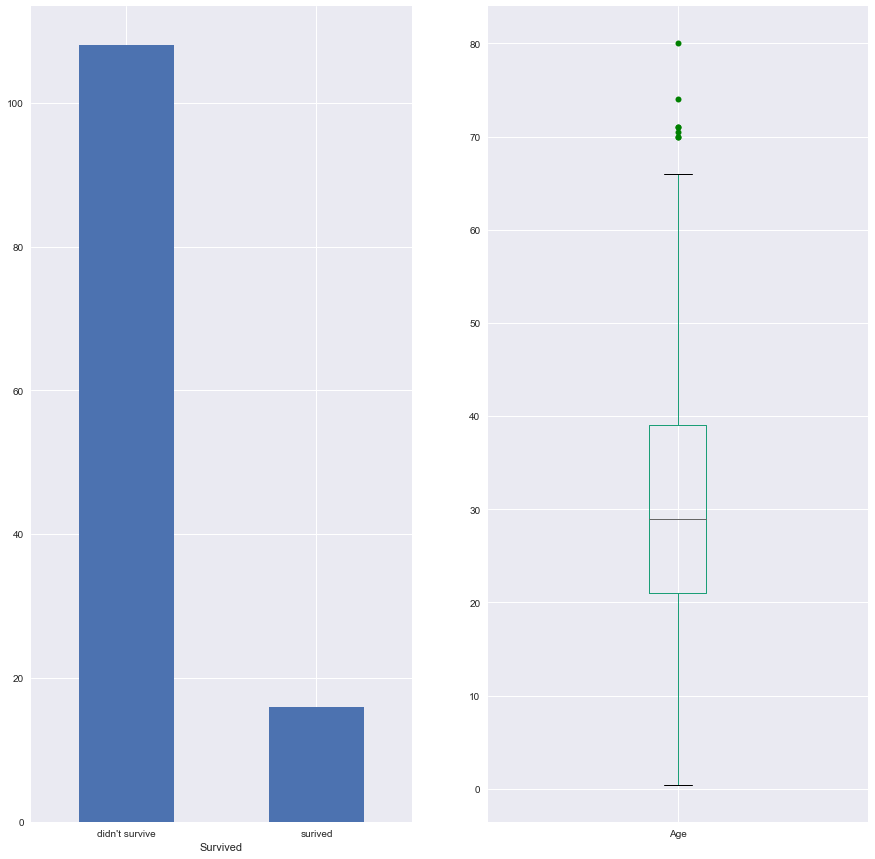

In [28]:
fig, ax = plt.subplots(1, 2)
fig.set_figheight(15)
fig.set_figwidth(15)

male_ages = titanic_raw_df[(titanic_raw_df['Age'] == titanic_raw_df['Age']) &\
               (titanic_raw_df['Sex'] == 'male')][['Sex', 'Age']]['Age']

male_survivors = titanic_raw_df[(titanic_raw_df['Age'] != titanic_raw_df['Age']) &\
    (titanic_raw_df['Sex'] == 'male')][['Sex', 'Survived']].groupby("Survived")['Sex'].count()

ax0 = male_survivors.plot(kind='bar', ax=ax[0])
ax0.set_xticklabels(["didn't survive", "surived"], rotation=0)

ax1 = male_ages.plot(kind='box', ax=ax[1], colormap='Dark2', sym='g')

plt.show()

Looking at the available age data for man, I wouldn't except many of these data points to young male adults. The IQR for age is about 20 to 40 years old. In other words, 50% of the men were over the age of 18. So, if there is no bias in the way the data was collect for young males then you would expect the missing male age data to be similar. But, there is uncertainty in this analysis because of the missing data.

### Where people with higher fares more likely to survive?

The price ones paid for a ticket on the titanic is probably correlated with what class that person was in. For example, a first-class passenger assuredly paid for his or her ticket at a high price. So, I would except the survival to have higher mean fare price when compared to passenger who did not.

In [7]:
titanic_raw_df[['Fare', 'Survived']].groupby('Survived').describe()

Fare                                                          
          count       mean        std  min      25%   50%   75%       max
Survived                                                                 
0         549.0  22.117887  31.388207  0.0   7.8542  10.5  26.0  263.0000
1         342.0  48.395408  66.596998  0.0  12.4750  26.0  57.0  512.3292

From the earlier boxplot on fare, I know there are fair number of outliers. So, out of curiosity, I calculated the upper limit outlier range (Q3 + 1.5×IQR) for both passenger who survived and those who didn’t, removed those data points, and calculated the descriptive statistics again.

In [29]:
survived_outlier_limit = 57.0 + 1.5*(57-12.4750)
nonsurvived_outlier_limit = 26.0 + 1.5*(26-7.8542)

print("standard deviation limit for surviving passengers, {0}".format(57.0 + 1.5*(57-12.4750)))
print("standard deviation limit for non-surviving passengers, {0}".format(26.0 + 1.5*(26-7.8542)))

standard deviation limit for surviving passengers, 123.7875
standard deviation limit for non-surviving passengers, 53.2187


In [30]:
temp = titanic_raw_df[(titanic_raw_df['Fare'] < survived_outlier_limit) & 
                      (titanic_raw_df['Survived'] == 1)]
temp['Fare'].describe()

count    314.000000
mean      32.990500
std       28.742998
min        0.000000
25%       11.160400
50%       23.250000
75%       51.965625
max      120.000000
Name: Fare, dtype: float64

In [31]:
temp = titanic_raw_df[(titanic_raw_df['Fare'] < nonsurvived_outlier_limit) & 
                      (titanic_raw_df['Survived'] == 0)]
temp['Fare'].describe()

count    506.000000
mean      15.028103
std       11.136333
min        0.000000
25%        7.795800
50%        9.225000
75%       21.000000
max       53.100000
Name: Fare, dtype: float64

Even excluding the outliers, I can see that mean fare price of the passengers who survived was around £33, which is still almost double that of passengers who didn't, £15.

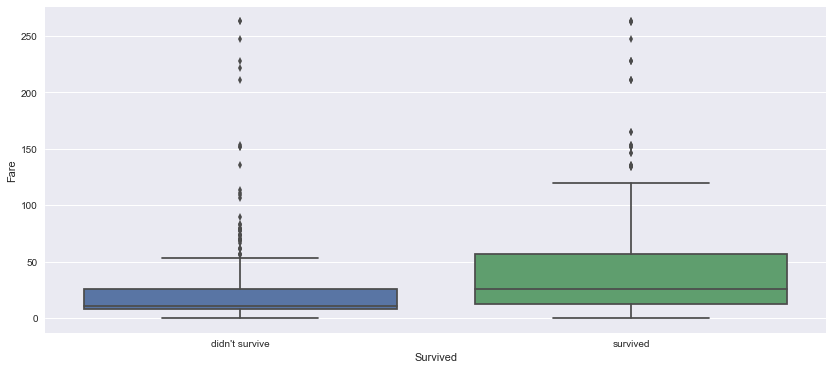

In [32]:
seaborn.set(rc={"figure.figsize": (14, 6)})
seaborn.boxplot(y='Fare', x='Survived',data=titanic_raw_df[titanic_raw_df['Fare'] < 512])
plt.xticks(plt.xticks()[0], ["didn't survive", "survived"])
plt.show()

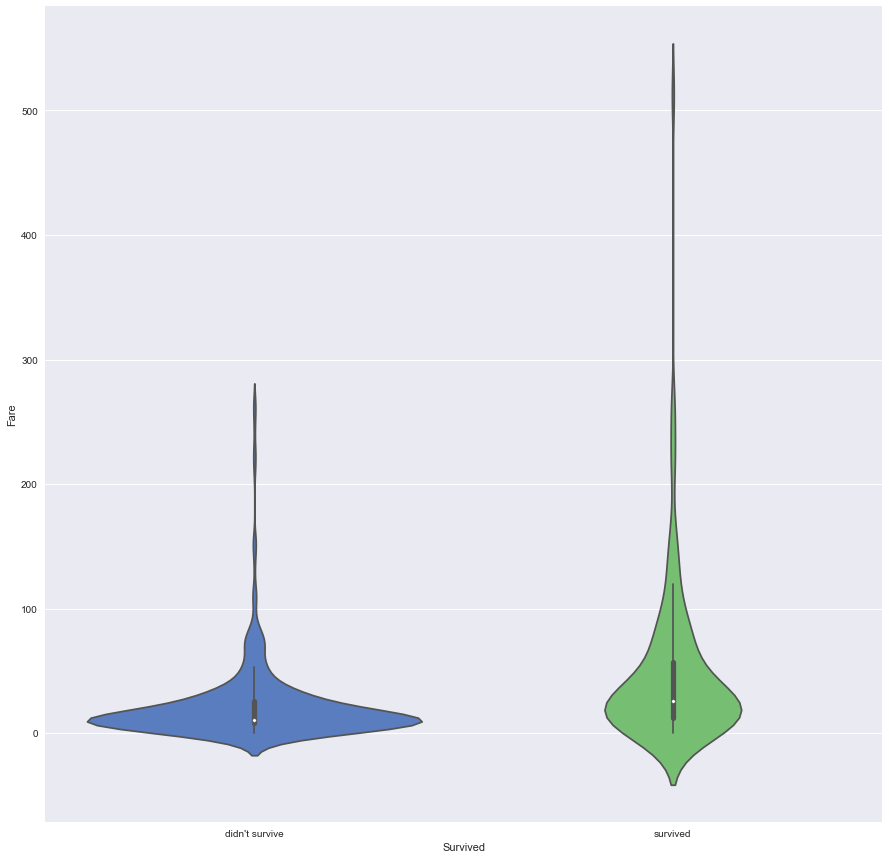

In [38]:
fig, ax = plt.subplots(figsize=(15,15))
seaborn.violinplot(ax=ax, y='Fare', x='Survived', 
                   data=titanic_raw_df, palette='muted')
plt.xticks(plt.xticks()[0], ["didn't survive", "survived"])
plt.show()

The above is a violin plot of fare grouped by survival including the outliers. The fare distribution for passengers who didn't survive is lower and more concentrated while the passengers who did survive is higher and more spread out.

#### Remarks

It seems clear that people who survived paid more for their ticket than those who did not. This may be due to the type of people who brought those tickets. People who were second and first class tickets (tickets with higher fares) where [very well off English-speaking people](https://en.wikipedia.org/wiki/Passengers_of_the_RMS_Titanic) who had more access to the ship and could easily communicate with crew members.

### Where people in higher class more likely to survive?

In [39]:
titanic_raw_df.groupby(['Pclass', 'Survived'])['Pclass'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Pclass, dtype: int64

In [40]:
first_class_non_survived, \
first_class_survived, \
second_class_non_survived, \
second_class_survived, \
third_class_non_survived, \
third_class_survived \
= titanic_raw_df.groupby(['Pclass', 'Survived'])['Pclass'].count().values

first_class_total, \
second_class_total, \
third_class_total \
= titanic_raw_df.groupby(['Pclass'])['Pclass'].count().values

In [41]:
print("There were {0} first class passengers, {1}% survived while {2}% did not survive".format(
                                                      first_class_total,
                                                      round(100 * first_class_survived / first_class_total, 2),
                                                      round(100 * first_class_non_survived / first_class_total, 2)))

print("There were {0} second class passengers, {1}% survived while {2}% did not survive".format(
                                                      second_class_total,
                                                      round(100 * second_class_survived / second_class_total, 2),
                                                      round(100 * second_class_non_survived / second_class_total, 2)))

print("There were {0} third class passengers, {1}% survived while {2}% did not survive".format(
                                                      third_class_total,
                                                      round(100 * third_class_survived / third_class_total, 2),
                                                      round(100 * third_class_non_survived / third_class_total, 2)))

There were 216 first class passengers, 62.96% survived while 37.04% did not survive
There were 184 second class passengers, 47.28% survived while 52.72% did not survive
There were 491 third class passengers, 24.24% survived while 75.76% did not survive


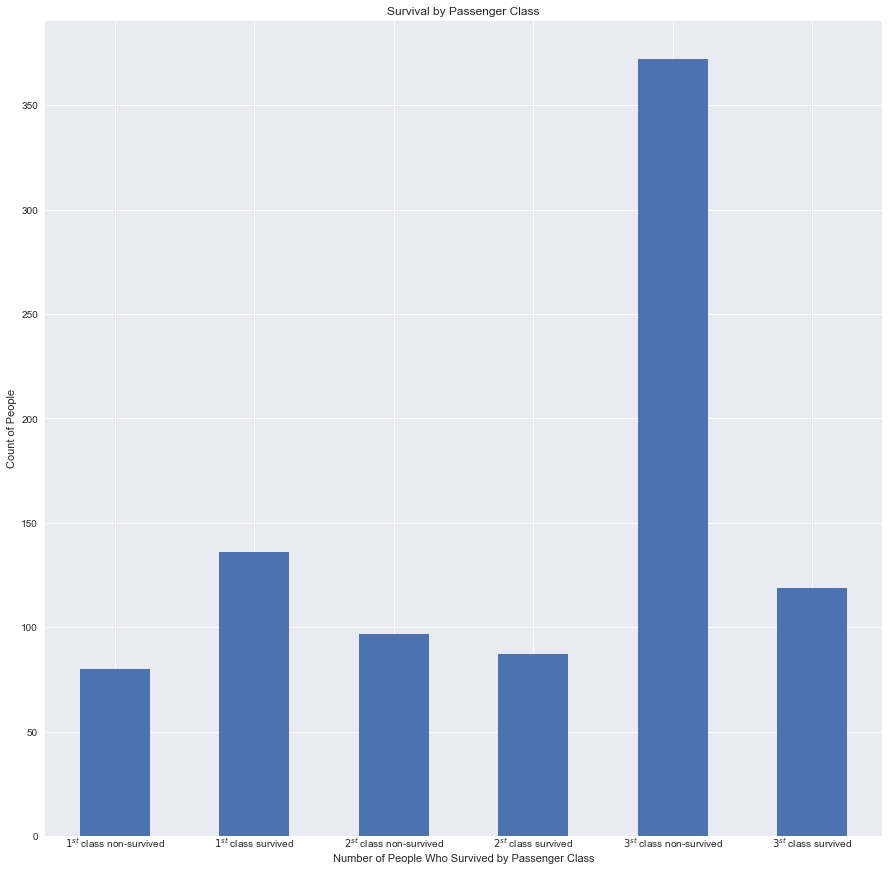

In [42]:
ax = titanic_raw_df.groupby(['Pclass', 'Survived'])['Pclass'].count().plot(kind='bar',rot = 0, 
                                                                            figsize=(15,15),
                                                    title='Survival by Passenger Class')
ax.tick_params(axis='x', pad=0)
ax.set_xlabel("Number of People Who Survived by Passenger Class")
ax.set_ylabel("Count of People")
ax.set_xticklabels([r'$1^{st}$ class non-survived',
                    r'$1^{st}$ class survived',
                    r'$2^{st}$ class non-survived',
                    r'$2^{st}$ class survived',
                    r'$3^{st}$ class non-survived',
                    r'$3^{st}$ class survived'])

plt.show()

From the graph, I can see that $1^{st}$ class had more survivor than either $2^{nd}$ class or $3^{rd}$. And, a much greater number of $3^{rd}$ class passenger died than survived. From this, I wouldn't say that being in $1^{st}$ or $2^{nd}$ greatly increased your odds of surviving, but being a $3^{rd}$ does seem to be negatively affect survival.

#### Remarks

As mention in 'Where people with higher fares more likely to survive?' section, $1^{st}$ or $2^{nd}$ passengers were mostly native English speakers who had more access to the ship. So, what about $3^{rd}$ class passengers? According to an article, they were a more mixed group of [people.](https://en.wikipedia.org/wiki/Passengers_of_the_RMS_Titanic) A language barrier could have impeded their survival. But, also, they were parts of the ship that were [blocked off](https://en.wikipedia.org/wiki/Passengers_of_the_RMS_Titanic). And, given they made up a pretty good proportion of passengers, the limited access to exit could have greatly hinder survival.

## Conclusion

I look at several factors that could have help with surviving the stinking of the Titanic. From the data, I think women and child were likely to survive than men, possible due to code of conduct of 'women and child first'. People with higher fares or $1^{st}$ or $2^{nd}$ passengers were more likely to survive possible due to English speaking abilities and access to less crowded escape points.

#### Limitations

As mentioned previously, the missing age data for male does add some uncertainty in the analysis. However, there are ways to approximate the age of the missing date with models given further analysis.

#### Further Analysis

I think it would be interesting is to analysis a passenger's sibling relation and parent relation and see if survival is corrected at all with these variables.